# Linear Regression Model and Analysis using statsmodels

using statsmodels.api library

Statsmodels follows largely the traditional model where we want to know how well a given model fits the data, and what variables "explain" or affect the outcome, or what the size of the effect is. In general, statsmodels is made for rigorous statistics.

In the previous post, I use scipy.stats to fit linear regression model. We get coefficient, slope, r_squared value, stadard error, and p-value by using scipy.stats. Meanwhile, if we use statsmodels library we get, well.. everything. Refer to image below to see the output of linear regression model using statsmodels library.

Steps of making Linear Regression Analysis:
1. Import dataset
2. Take sample from dataset.
3. Use pandas library to get descriptive statistics (mean. standard deviation, percentile)
4. Use pandas library to get correlation between each variable in the dataset
5. Set independent variable, x and dependent variable , y based on high correlation variables
6. Make boxplot for dependent and independent variable to check for outliers
7. Make scatterplot to see the trend between variables
8. Use statsmodels library to get linear regression model

In [1]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
%matplotlib inline

# Dataset
Student Perforamance Dataset (synthetic dataset)
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:\
Hours Studied: The total number of hours spent studying by each student.\
Previous Scores: The scores obtained by students in previous tests.\
Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).\
Sleep Hours: The average number of hours of sleep the student had per day.\
Sample Question Papers Practiced: The number of sample question papers the student practiced.

Target Variable:\
Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

In [2]:
student = pd.read_csv('Student_Performance.csv')
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   hours                             10000 non-null  int64 
 1   previous                          10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   performance                       10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [3]:
student.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hours,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
previous,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
performance,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


# Sampling

Take sample of 250 students by random. The dataset consist of 10000 students.\
We can also use all data but for the purpose of study, let's take this sample number. 

In [4]:
# create new column 'index' and make 'index' as index
# create new table for  sample data

sample = student.sample( n = 250 )
sample["index"] = np.arange(0,250)
sample = sample.set_index('index')
sample.head()

,hours,previous,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,performance
index,,,,,,
0,9,57,Yes,5,9,52
1,3,90,Yes,5,6,70
2,4,90,Yes,4,8,73
3,1,91,No,8,1,68
4,6,56,No,6,7,42


In [5]:
# change data type from category to number
# change yes and no to 1 and 0 for extracurricular activities

sample['Extracurricular Activities'] = sample['Extracurricular Activities'] .astype('category')
sample['Extracurricular Activities'] = sample['Extracurricular Activities'] .cat.codes
sample.head()

,hours,previous,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,performance
index,,,,,,
0,9,57,1,5,9,52
1,3,90,1,5,6,70
2,4,90,1,4,8,73
3,1,91,0,8,1,68
4,6,56,0,6,7,42


# Correlation
Calculate the correlation between all independent variable and dependent variable.\
There is high correlation betweem previous exam score and student's performance score

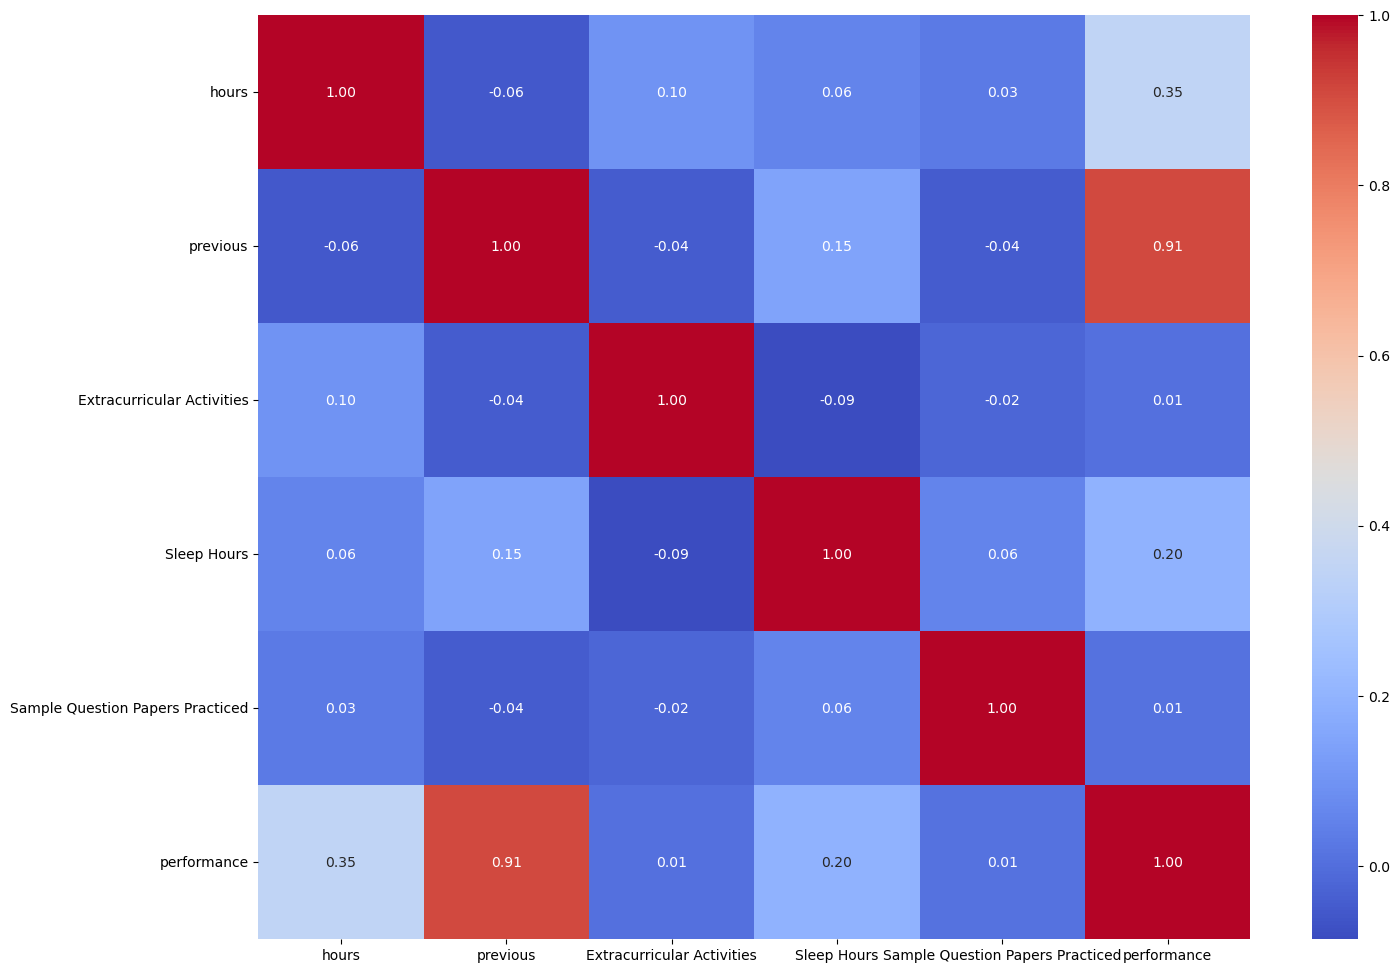

In [6]:
plt.figure(figsize = (16,12))
sns.heatmap(data = sample.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

# Simple Linear Regression by pure python

Simple linear regression between independent variable, previous score and dependent variable, performance score.\
Linear Regression by pure python. 

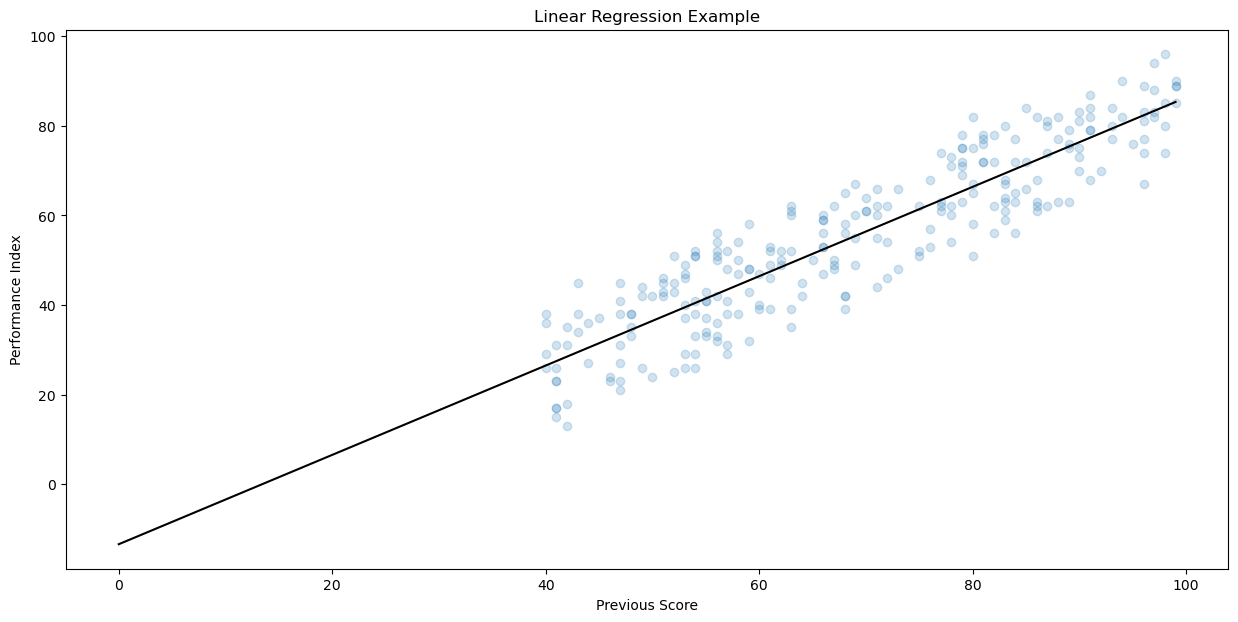


    < Summary of simple linear regression >
    Pearson Correaltion Coefficient (R) is 0.908484918612272
    The linear regression equation is y = 0.9976875644206977x + -13.42480268497851
    The coefficient of determination (R^2) is  0.8253448473459464
    
    < Meaning behind this regression>
    This means that the strenght of correlation between independent and dependent variable is 90.8484918612272%,
    but the strenght of the model ( ie the accuracy of the prediction compared to the real value ) of the model is 82.53448473459464%
    Exactly 82.53448473459464% of the vatiation of dependent variable can be explained by independent variable using this model
    
    <Fit of Regression Line>
    Null hypothesis : the regression line does not capture the relationship between variables
    H0 : variance of Reg <= variance of Res
    F-value = MSReg/MSRes 
    Thus, our F-value equal to 1171.9409306361767
    f-critical with 95% confidence level is 3.87922825535667 
    

    F-valu

In [7]:
data_raw = { 0 : sample.previous , 1 : sample.performance} 
data = pd.DataFrame( data_raw)

data_regression = {}
data_regression_square = {}
total_data_regression_square = {}
for i in range(0,2):
    data_regression[i] = []
    data_regression_square[i] = []
    for x in data.loc[:,i]:
        regress = x - np.mean(data.loc[:,i])
        regress_square = ( x - np.mean(data.loc[:,i]) ) ** 2
        data_regression[i].append(regress)
        data_regression_square[i].append(regress_square)
    total_data_regression_square[i] = np.sum(data_regression_square[i])

multiplication_of_regress = []
for j in range(0,1):
    for y in range(0, len(data_regression[j])):
        multiply_2_regress = data_regression[j][y] * data_regression[j+1][y]
        multiplication_of_regress.append(multiply_2_regress)
    sum_of_multiplication = np.sum(multiplication_of_regress)
    pearson_correlation_coefficient = sum_of_multiplication / ( (np.sum(data_regression_square[j]) * np.sum(data_regression_square[j+1]) )** 0.5)
    sy = ((np.sum(data_regression_square[j+1])) / (len(data_regression_square[j+1])-1))  ** 0.5 
    sx = ((np.sum(data_regression_square[j] ))/ (len(data_regression_square[j])-1))  ** 0.5 
    b = pearson_correlation_coefficient * sy / sx
    a = np.mean(data.loc[:,j+1]) - b * np.mean(data.loc[:,j])
    x = np.linspace(0,max(data.loc[:,j]),20) 
    y_score = []
    for k in x:
        y = b * k + a
        y_score.append(y)
prediction= []
for l in data.loc[:,0]:
    y = b * l + a 
    prediction.append(y)
random_error = prediction - data.loc[:,1]        
SST = []
SSReg = []
SSRes = []
for m in range(0,len(data.loc[:,1])):
    sst = (data.loc[:,1][m] - np.mean(data.loc[:,1])) ** 2
    SST.append(sst)
    ssreg = (prediction[m] - np.mean(data.loc[:,1])) ** 2
    SSReg.append(ssreg)
    ssres = (data.loc[:,1][m] - prediction[m]) ** 2
    SSRes.append(ssres)
Total_SST = np.sum(SST)
Total_SSReg = np.sum(SSReg)
Total_SSRes = np.sum(SSRes)
R_squared = Total_SSReg / Total_SST
MSRes = Total_SSRes / (len(data.loc[:,1])-2)
MSReg = Total_SSReg / 1
f_value = MSReg / MSRes
f_critical = stats.f.ppf(q = 0.95, dfn = 1, dfd = (len(data.loc[:,1])-2))

plt.figure(figsize =(15,7))
plt.plot(x, y_score, color = 'black')
plt.title('Linear Regression Example')
plt.xlabel('Previous Score')
plt.ylabel('Performance Index')
plt.scatter(data.loc[:,j],data.loc[:,j+1],alpha = 0.2)
plt.show()
    
text =    f"""
    < Summary of simple linear regression >
    Pearson Correaltion Coefficient (R) is {pearson_correlation_coefficient}
    The linear regression equation is y = {b}x + {a}
    The coefficient of determination (R^2) is  {R_squared}
    
    < Meaning behind this regression>
    This means that the strenght of correlation between independent and dependent variable is {pearson_correlation_coefficient * 100}%,
    but the strenght of the model ( ie the accuracy of the prediction compared to the real value ) of the model is {R_squared * 100}%
    Exactly {R_squared * 100}% of the vatiation of dependent variable can be explained by independent variable using this model
    
    <Fit of Regression Line>
    Null hypothesis : the regression line does not capture the relationship between variables
    H0 : variance of Reg <= variance of Res
    F-value = MSReg/MSRes 
    Thus, our F-value equal to {f_value}
    f-critical with 95% confidence level is {f_critical} 
    """
print(text)

if f_value > f_critical:
    print("""
    F-value > F-critical, using signifance level of alpha = 0.05, Null hypothesis is rejected.
    We can accept that the regression line is a good fit for data with 95% confidence level
    
    """)
else:
    print("""
    F-value < F-critical, using signifance level of alpha = 0.05, Null hypothesis is failed to be rejected.
    We can not accept that the regression line is a good fit for data with 95% confidence level
    
    """)

# Descriptive Statistics

Count, mean , standard deviation, min, percentile of sample data set

In [8]:
x = sample['previous']
y = sample['performance']
sample.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hours,250.0,5.212,2.578692,1.0,3.0,5.0,7.75,9.0
previous,250.0,68.844,16.967831,40.0,55.0,68.0,83.00,99.0
Extracurricular Activities,250.0,0.488,0.500859,0.0,0.0,0.0,1.00,1.0
Sleep Hours,250.0,6.584,1.701330,4.0,5.0,7.0,8.00,9.0
Sample Question Papers Practiced,250.0,4.584,2.960745,0.0,2.0,5.0,7.00,9.0
performance,250.0,55.260,18.633875,13.0,41.0,54.0,70.75,96.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1ef65163a30>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef663b2da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef65497af0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef663b36a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef663b2140>],
 'means': []}

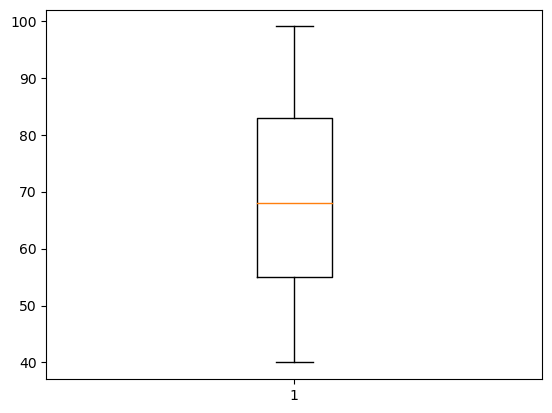

In [9]:
# boxplot of student's previous score
# no outliers based on the boxplot for x data
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef65610130>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef65610670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef655e7e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef65610bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef65610e50>],
 'means': []}

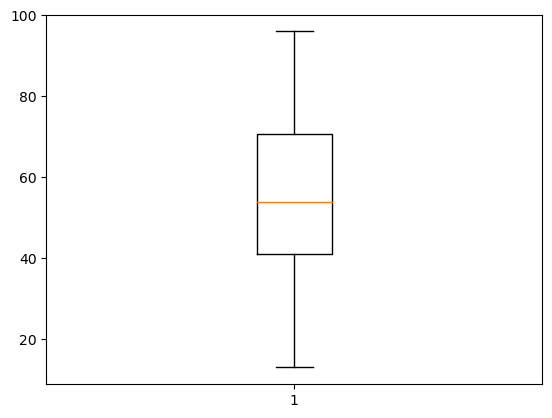

In [10]:
# boxplot of student performance score
# no outliers in boxplot based on y data
plt.boxplot(y)

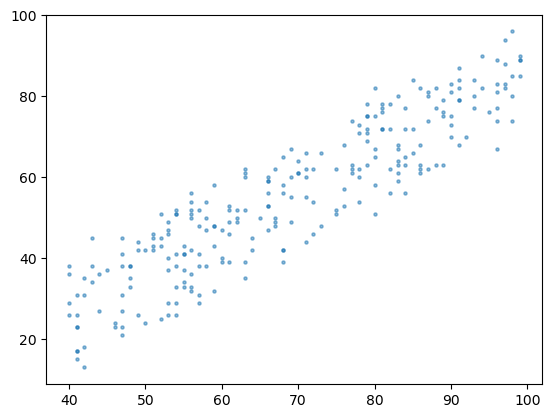

In [11]:
# scatter plot between previous test score and performance score
# there is upward trend, positive correlation between independent variable and dependent variable

plt.scatter(x,y, s = 5 , alpha = 0.5)

# Linear Regression using statsmodel

Stats model use Ordinary Least Square method that allow us to find the best line that describe the relationship between one or more predictor available and a response variable.

Statsmodels follows largely the traditional model where we want to know how well a given model fits the data, and what variables "explain" or affect the outcome, or what the size of the effect is. Scikit-learn follows the machine learning tradition where the main supported task is chosing the "best" model for prediction.

Stats model vs Skikit Learn

In general, scikit-learn is designed for machine-learning, while statsmodels is made for rigorous statistics. Both libraries have their uses. Before selecting one over the other, it is best to consider the purpose of the model.

A model designed for prediction is best fit using scikit-learn, while statsmodels is best employed for explanatory models. 

In [13]:
import statsmodels.api as sm
# add constant to predictor variable
X = sm.add_constant(x)
#fir linear regression model 
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            performance   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1172.
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           5.97e-96
Time:                        01:44:16   Log-Likelihood:                -867.36
No. Observations:                 250   AIC:                             1739.
Df Residuals:                     248   BIC:                             1746.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.4248      2.066     -6.497      0.0

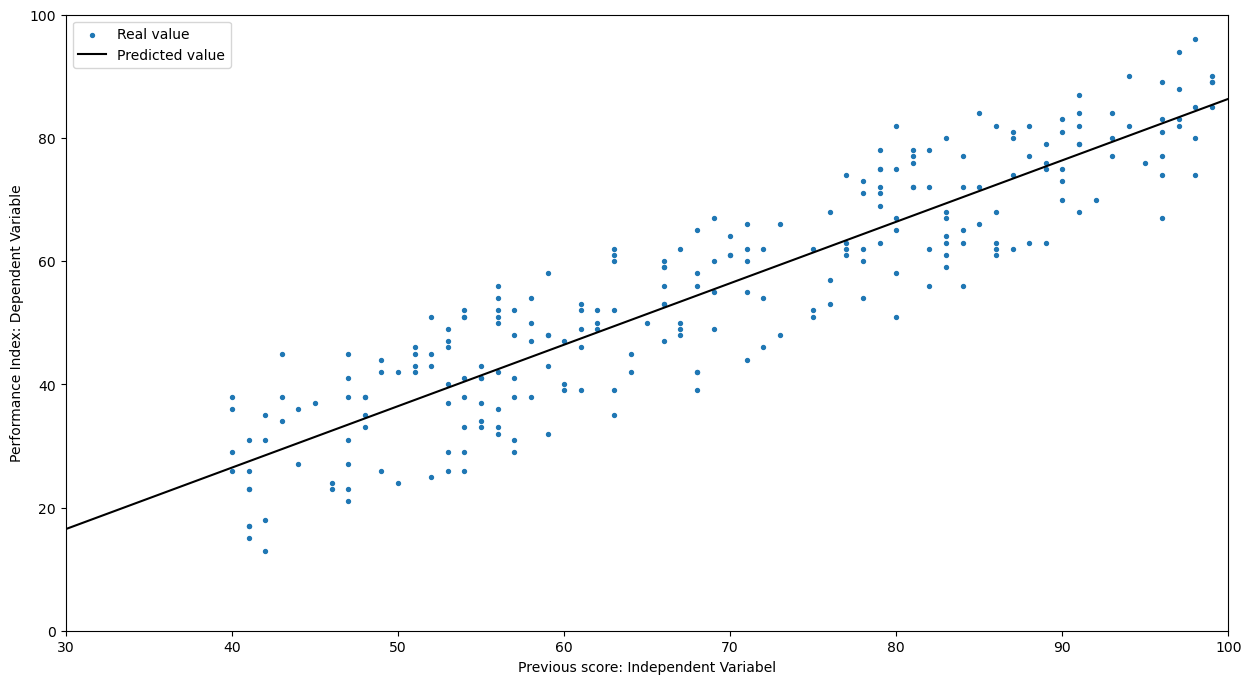

In [14]:
# regression model equation 
prediction_score = []
x_axis_value = np.arange(0,100+1)
for i in x_axis_value:
    y_predict = model.params.previous * i + model.params.const
    prediction_score.append(y_predict)
    

plt.figure(figsize = (15,8))
plt.scatter(x, y, s = 8 , alpha = 1, label = 'Real value')
plt.plot(x_axis_value, prediction_score, color = 'black', label = 'Predicted value')
ax = plt.gca()
ax.set_xlim([30, 100])
ax.set_ylim([0, 100])
plt.xlabel('Previous score: Independent Variabel')
plt.ylabel('Performance Index: Dependent Variable')
plt.legend()
plt.show()

Model Summary: 

1. The equation of linear regression is y = 0.9680x - 12.6107 . This is almost same as linear regression using pure python above
2. The R-square is 0.826. Quite high for these two variables. We can say that 82.6% of the data variation can be explained by this model. 
3. ANOVA : F-statistic and p-value for our regression model are 1176. and 4.09e-96 respectively. We can say that our regression model is good fit for the data with 95% confidence level. \
Null Hypothesis H0: Mean Squared Regression < = Mean Squared Residual\
p < 0.05, Null Hypothesis is rejected 
4. t-value for model coefficient and is high, so its p-value is below 0.05. We can safely say that our linear regression explanatory variable is statistically significance. We can reject Null Hypothesis, there is linear relationship between the two variables. \
Null Hypothesis : B1 = 0\
This null hypothesis is rejected
5. The regression coefficient confidence interval is [0.912	, 1.024], we can safely conclude that the model is good fit because the explanatory variable is more than 0 ie interval does not contain 0

In [24]:
# make prediction based on one random independent variable value
# for previous test score of 80, student's performance index will be 64.83
def predictionValue(independent_variable):
    y_predict = model.params.previous * independent_variable + model.params.const
    return y_predict
predictionValue(80)

65.98662012829672